In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import time
convergence=False

In [2]:
x=np.arange(0,100)/10
y=np.square(x)

In [3]:
import matplotlib.pyplot as plt

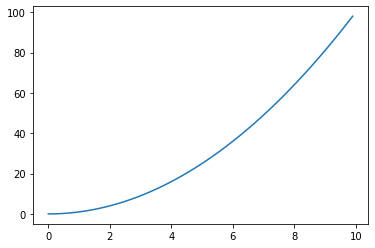

In [4]:
plt.plot(x,y)

In [5]:
data=np.vstack([x,y]).T

In [6]:
data[0]

array([0., 0.])

In [7]:
np.random.shuffle(data)

In [8]:
data=data.T

In [9]:
data[1]

array([3.240e+00, 5.929e+01, 8.649e+01, 8.281e+01, 3.249e+01, 4.900e+01,
       4.096e+01, 1.960e+00, 6.250e+00, 8.836e+01, 3.600e-01, 6.561e+01,
       7.569e+01, 4.410e+00, 1.225e+01, 3.364e+01, 9.801e+01, 2.025e+01,
       5.625e+01, 5.476e+01, 1.521e+01, 6.241e+01, 9.409e+01, 2.304e+01,
       5.041e+01, 1.089e+01, 5.184e+01, 2.500e-01, 2.401e+01, 2.601e+01,
       3.721e+01, 1.000e-02, 3.610e+00, 1.296e+01, 6.400e-01, 9.025e+01,
       1.210e+00, 7.056e+01, 5.329e+01, 1.936e+01, 7.225e+01, 6.724e+01,
       7.921e+01, 3.136e+01, 7.744e+01, 1.024e+01, 2.116e+01, 9.216e+01,
       3.481e+01, 2.560e+00, 1.156e+01, 1.764e+01, 4.356e+01, 7.840e+00,
       4.624e+01, 1.690e+00, 4.761e+01, 9.000e-02, 4.489e+01, 2.704e+01,
       7.396e+01, 2.916e+01, 2.250e+00, 2.890e+00, 6.760e+00, 1.440e+00,
       9.000e+00, 9.604e+01, 1.681e+01, 8.410e+00, 2.500e+01, 3.600e+01,
       3.844e+01, 1.600e+01, 4.900e-01, 8.464e+01, 3.025e+01, 8.100e-01,
       1.000e+00, 4.000e+00, 0.000e+00, 6.889e+01, 

In [10]:
#plt.plot(data[0],data[1])

In [11]:
weights=35
generalization_factor=[i for i in range(weights)]

In [12]:
class Model():
    def __init__(self,data,g):
        self.weights=np.ones((35,1))
        self.gen_factor=g
        self.x=data[0]
        self.y=data[1]
        
        self.min=0
        self.max=10
        self.weights_no=35
        self.lr=0.001
        self.total_loss=0
        self.total_prev_loss=0
        self.prev_loss=0
        self.total_loss=0
        self.dict_for_A={}
        self.ypred_list=[]
        self.len_of_val=100
        #self.y_=x[1]
        
        self.epochs=10000
        #print([i for i in self.x])
        #self.trial=int(np.floor((no_vector)*((i-self.min)/(self.min-self.max))))
        self.mapping=self.mapping_fn(self.gen_factor)#np.zeros((35,100))


    def mapping_fn(self,gn):
        no_vector=self.weights_no-self.gen_factor+1
        mapp=np.zeros((no_vector,self.weights_no))
        for i in self.x:
            #print(i)
            # if(i<self.min):
            #     index=0
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # if(i>self.max):
            #     index=34-self.gen_factor
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     #print('0')
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # else:
            if self.gen_factor%2==1:
                x=np.linspace(0.1,1,self.gen_factor)
                x[int((len(x)+1)/2 ):]=np.flip(x[:int((len(x)+1)/2)-1])
                index=int(np.floor((no_vector)*((i-self.min)/(self.max-self.min))))
                #print(index)
                self.dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=x
            else:
                x=np.linspace(0.1,1,self.gen_factor)
                x[int((len(x))/2 ):]=np.flip(x[:int((len(x))/2)])
                index=int(np.floor((no_vector)*((i-self.min)/(self.max-self.min))))
                #print(index)
                self.dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=x
        return mapp
    def predict(self,x_A):
        #self.x_A_trail=x_A
        return x_A@self.weights
    
    def loss_fn(self,y_train,y_pred):
        #print(y_train)
        return y_train- y_pred
    
    def backprop(self,x,loss):
        weights=self.weights.copy()
        self.trail_type=type(weights)
        if len(weights.shape)==2:
        
            weights=np.reshape(weights,(weights.shape[0]))
        #print('shape_a_x- ',x.shape)
        #print('shape_weights- ',weights.shape)
        self.weights_trial=weights*self.lr
        
        self.trial_loss=loss 
        weights= weights+loss*weights*x*self.lr 
        weights=np.reshape(weights,self.weights.shape)
        self.weights=weights
        #return weights 
    
    def val_step(self,x,y):
        weights=self.weights
        
        y_pred=self.predict(x)
        self.ypred_list_v.append(y_pred)
        self.ypred_list.append(y_pred)
        loss=self.loss_fn(y,y_pred)
        self.total_loss+=loss
    def train_step(self,x,y):
        
        weights=self.weights
        y_pred=self.predict(x)
        self.ypred_list.append(y_pred)
        #print(y_pred)
        loss=self.loss_fn(y,y_pred)
        #self.total_loss+=loss
        self.backprop(x,loss)

    def fit(self):
        start=time.time()       
        epochs=self.epochs
        for e in range(epochs):
            self.ypred_list_v=[]
            self.total_prev_loss=self.total_loss
            self.total_loss=0
            self.ypred_list=[]
            for ip,op in zip(data[0,:70],data[1,:70]):
                #print(op)
                x_train=self.dict_for_A[ip]
                x_train=self.mapping[x_train,:]
                #self.trial=x_train
                #y_train=self.dict_for_A[op]
                y_train=op
                #print(y_train)
                self.train_step(x_train,y_train)
            for ip,op in zip(data[0,70:],data[1,70:]):
                x_train=self.dict_for_A[ip]
                x_train=self.mapping[x_train,:]
                #y_train=self.dict_for_A[op]
                y_train=op
                self.val_step(x_train,y_train)
                
            # if self.is_converged():
            #     print('converge',self.gen_factor)
            #     self.total_time=time.time()-start
            #     break
                
        error=self.error(np.array(self.ypred_list_v),data[1,70:])
        #print('epoch:',e,' accuracy =',1-(error)) 
    def is_converged(self):
        if np.abs(self.total_prev_loss-self.total_loss)<0.00001:
            return True 
        else:
            return False
    def error(self,y_pred,y_act):
        y_pred=y_pred.reshape(30)
        sub=np.subtract(y_pred,y_act)
        #sqr=np.abs(sub)
 
        sqr=np.square(sub)
        #self.y_p=y_pred
        #self.y_a=data[1]
        
        error=np.sum(sqr)

        total_error=np.sqrt(error)/self.len_of_val
        #self.sub=total_error
        return total_error

In [15]:
list_of_models=[]
convergence=True
if convergence:
#for gn in range(1):#generalization_factor:
    for gn in generalization_factor:
        model=Model(data,gn)
        #model=Model(data,gn)
        model.fit()
        list_of_models.append(model)
    list_converge_time=[i.total_time for i in list_of_models]
    list_gn=[i.gen_factor for i in list_of_models]
    plt.plot(list_gn,list_converge_time)
    plt.plot(list_gn,list_converge_time,label='dis_cmac')
    #plt.plot(list_cn_2,gn_1,label='cont_cmac')
    plt.legend()
    plt.show()
else:
    model=Model(data,gn=5)
    model.fit()
    x1=np.array(model.ypred_list).reshape(100)
    data_pred=np.vstack([data[0],x1])

    data1=data_pred.copy().T
    data1=data1[(data1[:,0]).argsort()]
    data1=data1.T
    plt.plot(data1[0],data1[1],label='dis_cmac')
    plt.show()
#model.trial_loss
#model.x[1]
#model.mapping.shape
#print(model.mapping)
#data[0,:70]
#model.trial_loss
#model.x[1]
#model.mapping.shape
#print(model.mapping)
#data[0,:70]

AttributeError: 'Model' object has no attribute 'total_time'

In [ ]:
list_converge_time=[i.total_time for i in list_of_models]
list_gn=[i.gen_factor for i in list_of_models]
plt.plot(list_gn,list_converge_time)

In [ ]:
print(list_converge_time)
print(list_gn)

In [ ]:
x1=np.array(model.ypred_list).reshape(100)
data_pred=np.vstack([data[0],x1])

data1=data_pred.copy().T

data1=data1[(data1[:,0]).argsort()]
data1=data1.T

In [ ]:
data1.shape

In [ ]:
plt.plot(data1[0],data1[1])

In [ ]:
data_pred=np.vstack([data[0],x])

data_t=data.copy().T
data_t=data_t[(data1[:,0]).argsort()]
data_t=data_t.T
plt.plot(data1[0],data1[1])

In [ ]:
plt.plot(x,y,label='Dataset')
plt.plot(data1[0],data1[1],label='Continious_CMSC')
plt.legend()

In [ ]:
min_=0
max_=99
no_vector=7
index=int(np.floor((no_vector)*((i-min_)/(min_-max_))))

In [ ]:
zss={}
zss[0]=1
zss[1]=2
zss

In [ ]:
x[0]=1
#z[1]=1
#y[2]=1
data1=data.copy().T
data1=data1[(data1[:,1]).argsort()]
data1=data.T

In [ ]:
arr = np.array([[-0.30565392, -0.96605562],
                [ 0.85331367, -2.62963495],
                [ 0.87839643, -0.28283675],
                [ 0.72676698,  0.93213482],
                [-0.52007354,  0.27752806],
                [-0.08701666,  0.22764316],
                [-1.78897817,  0.50737573],
                [ 0.62260038, -1.96012161],
                [-1.98231706,  0.36523876],
                [-1.07587382, -2.3022289 ]])

In [ ]:
data[0].reshape((1,len(data[0])))

In [ ]:
y=np.ones(3)
x=np.zeros(3)
x[2]=1
y.shape

In [ ]:
y[:2]=[1,1]

In [ ]:
import scipy.ndimage as sp
sp.gaussian_filter1d(np.linspace(0,1,5),sigma=1)

In [ ]:
import numpy as np
   
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    #ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)
#gkern()
x=np.linspace(0.1,1,5)
x[int((len(x)+1)/2 ):]=np.flip(x[:int((len(x)+1)/2)-1])

In [ ]:
x=np.linspace(0.1,1,4)
x[int((len(x))/2 ):]=np.flip(x[:int((len(x))/2)])
x

In [ ]:
x[:int((len(x))/2)]

In [ ]:
mapping=np.zeros((35,100))

In [ ]:
mapping.shape

In [ ]:
mapping[:,0].shape

In [ ]:
   index=int(np.floor((no_vector)*((i-self.min)/(self.min-self.max))))
                self.dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=1
no_vec=7-3+1
mapp=np.zeros((5,7))
for i in range(0,10):

    index=int(np.floor((no_vec)*((i)/(10))))
    mapp[index,index:index+3]=1

In [ ]:
mapp

In [ ]:
for i,j in zip(data[0],data[1]):
    print(i,j)

In [ ]:
data